In [1]:
%matplotlib inline
from sklearn.datasets import make_classification
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [2]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.7679
Time:                        22:49:07   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006
==============================================================================
"""

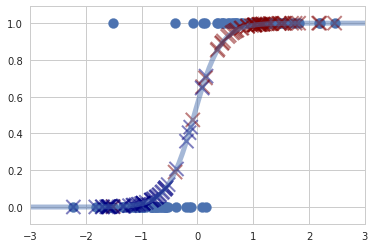

In [3]:
xx = np.linspace(-3, 3, 100)
sigmoid = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, sigmoid, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2, alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

### 예제1: Michelin 가이드 평점 예측

In [4]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinNY.csv", 
                 encoding="latin1")
df.tail()

,InMichelin,Restaurant Name,Food,Decor,Service,Price
159,0,Terrace in the Sky,23,25,21,62
160,1,Tocqueville,25,21,24,65
161,1,Triomphe,25,22,22,65
162,0,Village,20,20,19,40
163,1,Vong,23,24,21,60


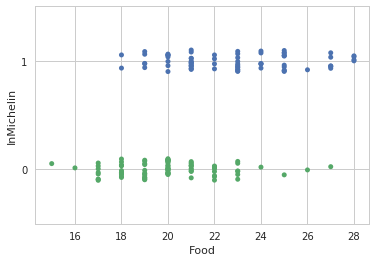

In [5]:
sns.stripplot(x="Food", y="InMichelin", data=df, jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [6]:
model = sm.Logit.from_formula("InMichelin ~ Food + Decor + Service + Price", df)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             InMichelin   No. Observations:                  164
Model:                          Logit   Df Residuals:                      159
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.3428
Time:                        22:49:09   Log-Likelihood:                -74.198
converged:                       True   LL-Null:                       -112.89
                                        LLR p-value:                 6.213e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1975      2.309     -4.850      0.000     -15.723      -6.672
Food           0.4048      0.131      3.080      0.002       0.147       0.662
Decor          0.1000      0.089      1.121      0.262      -0.075       0.275
Service       -0.1924      0.124     -1.557      0.119      -0.435       0.050
Price          0.0917      0.032      2.889      0.004       0.029       0.154
==============================================================================
"""

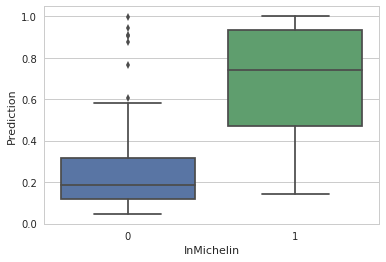

In [7]:
df["Prediction"] = result.predict(df)
sns.boxplot(x="InMichelin", y="Prediction", data=df)
plt.show()

# 연습 1

1) 붓꽃 분류 문제에서 클래스가 setosa, versicolor인 데이터만 사용하고 (setosa=0, versicolor=1) 독립변수로는 꽃받침 길이(Sepal Length)와 상수항만 사용하여 StatsModels 패키지의 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다.

In [8]:
from sklearn.datasets import load_iris
iris= load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, dtype="category")
sy = y.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
df['SeVer'] = df['species'].apply(lambda x: 0 if x =='setosa' else 1 if x=='versicolor' else None)
df1 = df.dropna(how='any')
df1 = df1.loc[:, ['sepal length (cm)', 'SeVer']]
df1.rename( { 'sepal length (cm)':'Sepal_length', 'news':'species'},inplace=True, axis='columns')

In [10]:
model = sm.Logit.from_formula("SeVer ~ Sepal_length", df1)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  SeVer   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.5368
Time:                        22:49:09   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
Sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113
================================================================================
"""

 2) 위 결과를 confusion matrix와 classification report로 표현한다.

In [11]:
from sklearn.metrics import *

y = df1['SeVer'].apply(lambda x: int(x))
y_pred = result.predict(df1['Sepal_length']).apply(lambda x: 1 if x >=0.5 else 0)
print("Confusion Matrix:\n\n",confusion_matrix(y, y_pred), "\n")
target_names = ['setosa', 'versicolor']
print("Classification report:\n\n",classification_report(y, y_pred, target_names=target_names))

Confusion Matrix:

 [[45  5]
 [ 6 44]] 

Classification report:

              precision    recall  f1-score   support

     setosa       0.88      0.90      0.89        50
 versicolor       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



3) 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

AUC : 0.89


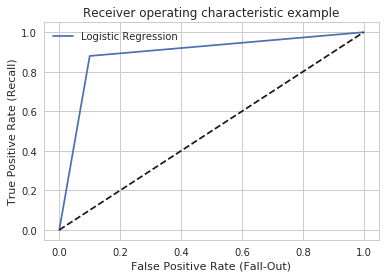

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y, y_pred)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
print ("AUC :",auc(fpr, tpr))
plt.show()

# 연습 2

1) 붓꽃 분류 문제에서 클래스가 versicolor, virginica인 데이터만 사용하여 (versicolor=0, virginica=1) 로지스틱 회귀 모형으로 결과를 예측하고 보고서를 출력한다. **독립 변수는 모두 사용**한다.

In [13]:
df['y'] = df['species'].apply(lambda x: 0 if x =='versicolor' else 1 if x=='virginica' else None)
y= df['y']

X.rename({'sepal length (cm)':'Sepal_length','sepal width (cm)':'Sepal_width',
                'petal length (cm)':'Petal_length','petal width (cm)':'Petal_width'},
                 axis='columns', inplace=True)

df = pd.concat([X,y], axis=1).dropna(how='any')

In [14]:
df.tail()

,Sepal_length,Sepal_width,Petal_length,Petal_width,y
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0
149,5.9,3.0,5.1,1.8,1.0


In [15]:
model = sm.Logit.from_formula("y ~ Sepal_length +Sepal_width+Petal_length+Petal_width", df)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.9142
Time:                        22:49:10   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.947e-26
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
Sepal_length    -2.4652      2.394     -1.030      0.303      -7.158       2.228
Sepal_width     -6.6809      4.480     -1.491      0.136     -15.461       2.099
Petal_length     9.4294      4.737      1.990      0.047       0.145      18.714
Petal_width     18.2861      9.743      1.877      0.061      -0.809      37.381
================================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

2) 위 결과를 confusion matrix와 classification report로 표현한다.

In [16]:
y_pred = result.predict(df.iloc[:,0:4]).apply(lambda x: 1 if x >=0.5 else 0)
print("Confusion Matrix:\n\n",confusion_matrix(df.iloc[:,-1:], y_pred), "\n")
target_names = ['versicolor', 'virginica']
print("Classification report:\n\n",classification_report(df.iloc[:,-1:], y_pred, target_names=target_names))

Confusion Matrix:

 [[49  1]
 [ 1 49]] 

Classification report:

              precision    recall  f1-score   support

 versicolor       0.98      0.98      0.98        50
  virginica       0.98      0.98      0.98        50

avg / total       0.98      0.98      0.98       100



3) 이 모형에 대해 ROC커브를 그리고 AUC를 구한다. 이 때 Scikit-Learn의 LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형을 사용한다.

AUC : 0.89


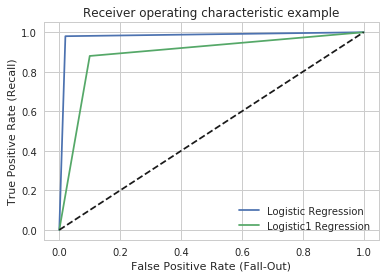

In [17]:
fpr2, tpr2, thresholds1 = roc_curve(df.iloc[:,-1:], y_pred)

plt.plot(fpr2, tpr2, label="Logistic Regression")
plt.plot(fpr, tpr, label="Logistic1 Regression")

plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
print ("AUC :",auc(fpr, tpr))
plt.show()

## 예제2: Michelin and Zagat 가이드 비교

다음 데이터는 뉴욕시의 레스토랑에 대한 두 개의 가이드북에서 발취한 것이다.

- Food: Zagat Survey 2006 의 고객 평가 점수
- InMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 수
- NotInMichelin: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실리지 않은 레스토랑의 수
- mi: 해당 고객 평가 점수를 받은 레스토랑의 수
- proportion: 해당 고객 평가 점수를 받은 레스토랑 중 2006 Michelin Guide New York City 에 실린 레스토랑의 비율

In [18]:
df = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/MichelinFood.txt", sep="\t")
df.tail()

,Food,InMichelin,NotInMichelin,mi,proportion
9,24,6,1,7,0.86
10,25,11,1,12,0.92
11,26,1,1,2,0.50
12,27,6,1,7,0.86
13,28,4,0,4,1.00


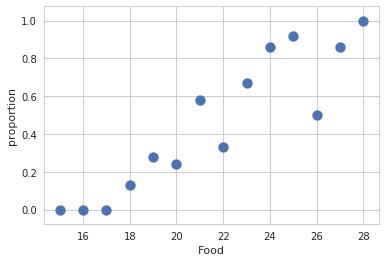

In [19]:
df.plot(kind="scatter", x="Food", y="proportion", s=100)
plt.show()

In [20]:
X = sm.add_constant(df.Food)
y = df.proportion # 이런 기능도 있었다니....
model = sm.Logit(y, X)
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             proportion   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Mar 2018   Pseudo R-squ.:                  0.4832
Time:                        22:49:12   Log-Likelihood:                -4.9712
converged:                       True   LL-Null:                       -9.6189
                                        LLR p-value:                  0.002297
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.3600      5.211     -1.988      0.047     -20.574      -0.146
Food           0.4671      0.235      1.991      0.046       0.007       0.927
==============================================================================
"""

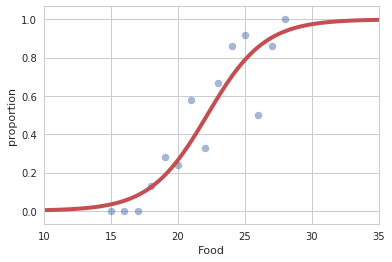

In [21]:
df.plot(kind="scatter", x="Food", y="proportion", s=50, alpha=0.5)
xx = np.linspace(10, 35, 100)
plt.plot(xx, result.predict(sm.add_constant(xx)), "r", lw=4)
plt.xlim(10, 35)
plt.show()